## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import numpy as np
import pandas as pd

import requests
import json
import tweepy
import io
import os

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [2]:
#Downloading images
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#opening file to save images
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [3]:
image_predictions = pd.read_csv("image_predictions.tsv")
image_predictions

,tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog
0,666020888022790149\thttps://pbs.twimg.com/medi...
1,666029285002620928\thttps://pbs.twimg.com/medi...
2,666033412701032449\thttps://pbs.twimg.com/medi...
3,666044226329800704\thttps://pbs.twimg.com/medi...
4,666049248165822465\thttps://pbs.twimg.com/medi...
...,...
2070,891327558926688256\thttps://pbs.twimg.com/medi...
2071,891689557279858688\thttps://pbs.twimg.com/medi...
2072,891815181378084864\thttps://pbs.twimg.com/medi...
2073,892177421306343426\thttps://pbs.twimg.com/medi...


In [4]:
image_predictions = pd.read_csv("image_predictions.tsv",sep="\t")
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [5]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [6]:
# did not work for me

consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [7]:
with open ('tweet-json.txt', 'r') as json_file:
    for line in json_file.readlines():
        # Read each JSON line
        each_tweet_line = json.loads(line)
        print(each_tweet_line)
        print('\n')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [8]:
tweets_list = []

# Open text file for reading
with open ('tweet-json.txt', 'r') as json_file:
    for line in json_file.readlines():
        # Read each JSON
        each_tweet_line = json.loads(line)
        # Getting the required parameters
        tweet_id = each_tweet_line['id']
        retwt_count = each_tweet_line['retweet_count']
        fav_count = each_tweet_line['favorite_count']
        follows_count = each_tweet_line['user']['followers_count']
        frnds_count = each_tweet_line['user']['friends_count']
        
        tweets_list.append({'id': tweet_id,
                       'retweet_count': retwt_count,
                       'favorite_count': fav_count,
                       'followers_count': follows_count,
                       'friends_count': frnds_count})
        
tweets_list

[{'id': 892420643555336193,
  'retweet_count': 8853,
  'favorite_count': 39467,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 892177421306343426,
  'retweet_count': 6514,
  'favorite_count': 33819,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 891815181378084864,
  'retweet_count': 4328,
  'favorite_count': 25461,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 891689557279858688,
  'retweet_count': 8964,
  'favorite_count': 42908,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 891327558926688256,
  'retweet_count': 9774,
  'favorite_count': 41048,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 891087950875897856,
  'retweet_count': 3261,
  'favorite_count': 20562,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 890971913173991426,
  'retweet_count': 2158,
  'favorite_count': 12041,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': 890729181411237888,
  'retweet_count': 16716,
 

In [9]:
tweet_json = pd.DataFrame(tweets_list, columns=['id', 'retweet_count', 'favorite_count', 'followers_count', 'friends_count'])

In [10]:
tweet_json

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104
...,...,...,...,...,...
2349,666049248165822465,41,111,3201018,104
2350,666044226329800704,147,311,3201018,104
2351,666033412701032449,47,128,3201018,104
2352,666029285002620928,48,132,3201018,104


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [11]:
df1 = twitter_archive

In [12]:
df2 = image_predictions

In [13]:
df3 = tweet_json

#### Assessing df1 data

In [14]:
df1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
df1.text.sample(50)

292     This is Daisy. She's puppears to be rare as al...
2343    Let's hope this flight isn't Malaysian (lol). ...
678     This is Stella. She's happier than I will ever...
904     This is Corey. He's a Portobello Corgicool. Tr...
1613    I would like everyone to appreciate this pup's...
192     I HEARD HE TIED HIS OWN BOWTIE MARK AND HE JUS...
1154    Pup had to be removed cuz it wouldn't have bee...
660     This is Mabel. She's super h*ckin smol. Portab...
1333    This is Cooper. He only wakes up to switch gea...
327     RT @rolltidered: This is Gabby. Now requests t...
10      This is Koda. He is a South Australian decksha...
1298    When your roommate eats your leftover Chili's ...
504     This is Bauer. He had nothing to do with the c...
1248    "Please, no puparazzi" 11/10 https://t.co/nJIX...
1760    Here we are witnessing a wild field pupper. Lo...
1645    This is Jiminy. He's not the brightest dog. Ne...
434     RT @dog_rates: We are proud to support @LoveYo...
988     What j

In [16]:
df1.shape

(2356, 17)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [19]:
df1.tweet_id.duplicated().sum()

0

In [20]:
df1.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [21]:
df1.rating_numerator.isnull().value_counts()

False    2356
Name: rating_numerator, dtype: int64

In [22]:
df1.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [23]:
df1.rating_denominator.isnull().value_counts()

False    2356
Name: rating_denominator, dtype: int64

In [24]:
df1.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [25]:
df1[df1.retweeted_status_id.notnull()].retweeted_status_id

19      8.874740e+17
32      8.860537e+17
36      8.305833e+17
68      8.780576e+17
73      8.782815e+17
            ...     
1023    6.678667e+17
1043    6.671383e+17
1242    7.119983e+17
2259    6.675487e+17
2260    6.675484e+17
Name: retweeted_status_id, Length: 181, dtype: float64

#### Assessing df2 data

In [26]:
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [27]:
df2.shape

(2075, 12)

In [28]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
df2.duplicated().sum()

0

#### Assessing df3 data

In [31]:
df3

,id,retweet_count,favorite_count,followers_count,friends_count
0,892420643555336193,8853,39467,3200889,104
1,892177421306343426,6514,33819,3200889,104
2,891815181378084864,4328,25461,3200889,104
3,891689557279858688,8964,42908,3200889,104
4,891327558926688256,9774,41048,3200889,104
...,...,...,...,...,...
2349,666049248165822465,41,111,3201018,104
2350,666044226329800704,147,311,3201018,104
2351,666033412701032449,47,128,3201018,104
2352,666029285002620928,48,132,3201018,104


In [32]:
df3.shape

(2354, 5)

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   id               2354 non-null   int64
 1   retweet_count    2354 non-null   int64
 2   favorite_count   2354 non-null   int64
 3   followers_count  2354 non-null   int64
 4   friends_count    2354 non-null   int64
dtypes: int64(5)
memory usage: 92.1 KB


In [34]:
df3.describe()

,id,retweet_count,favorite_count,followers_count,friends_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03,2354.0
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06,104.0
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01,0.0
min,6.660209e+17,0.000000,0.000000,3.200799e+06,104.0
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06,104.0
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06,104.0
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06,104.0
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06,104.0


In [35]:
df3.duplicated().sum()

0

### Quality issues

`twitter_archive`


- Missing values in [in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp, expanded_urls] columns
- The column name contains wrong names
- Surprising values in rating_denominator & rating_numerator column
- wrong datatype : tweet_id
- Inconsistent rating
- some text are for retweets tweets

`image_predictions`

- Some pictures are not dogs
- remove retweet_count
- wrong datatype : tweet_id
- Some values are false in columns 'p1', 'p2', and 'p3' for dogs prediction, one True rrediction data is enough

`tweet_json`

- wrong datatype : id

### Tidiness issues

`twitter_archive`

- doggo, floofer, pupper and puppo columns are category of dogs, and we only need 'stage' column

`tweet_json`

- Change id to tweet_id

#### Common

- Duplicate column names present in `twitter_archive`, `image_predictions` and `tweet_json`
- Total observations in `twitter_archive` (2356) is more than `image_predictions` (2075) and `tweet_json` (2354 - as some tweet ID status is not available now)


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [36]:
# Make copies of original pieces of data
df1_clean = df1.copy()
df2_clean = df2.copy()
df3_clean = df3.copy()

### Issue #1:

columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and source have lots of Null values.

missing values in expanded_urls column

#### Define:

drop  in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, source, expanded_urls

#### Code

In [37]:
drop_list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls']

# Drop the columns 
df1_clean.drop(drop_list, axis=1, inplace=True)

#### Test

In [38]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   int64 
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
dtypes: int64(3), object(8)
memory usage: 202.6+ KB


### Issue #2

#### Define

Drop text that start with **RT @**

#### Code

In [39]:
df1_clean = df1_clean[df1_clean['text'].str.contains('RT') == False]
#for txt in df1_clean['text']:
 #   if txt[0] == 'R' and txt[1] == 'T' :
  #      df1_clean.drop([df1_clean.text])


#### Test

In [40]:
df1_clean.text.sample(50)

229     This is Jerry. He's doing a distinguished tong...
609     This is Cassie. She steals things. Guilt incre...
1069    When the photographer forgets to tell you wher...
2081    Can't do better than this lol. 10/10 for the o...
1646    Here we see a faulty pupper. Might need to rep...
1877    C'mon guys. We've been over this. We only rate...
1002    This is a mighty rare blue-tailed hammer sherk...
477     Meet Jack. He's one of the rare doggos that do...
1312    This is Ellie. She requests to be carried arou...
1072    This is Nollie. She's waving at you. If you do...
1436    Meet Charlie. He likes to kiss all the big mil...
81      This is Nelly. He graduated with his dogtorate...
1343    This pupper killed this great white in an epic...
1216    This is Calbert. He forgot to clear his Google...
1683    This is Bo. He's a Benedoop Cumbersnatch. Seem...
980     This is Lucy. She's a Benebop Cumberplop. 12/1...
240     This is Barney. He's an elder doggo. Hitches a...
1757    Meet W

### Issue #2

remove retweet_count

#### Define

Drop retweet_count

#### Code

In [41]:
# Drop the retweet_count column
df3_clean.drop('retweet_count', axis=1, inplace=True)

#### Test

In [42]:
df3_clean

,id,favorite_count,followers_count,friends_count
0,892420643555336193,39467,3200889,104
1,892177421306343426,33819,3200889,104
2,891815181378084864,25461,3200889,104
3,891689557279858688,42908,3200889,104
4,891327558926688256,41048,3200889,104
...,...,...,...,...
2349,666049248165822465,111,3201018,104
2350,666044226329800704,311,3201018,104
2351,666033412701032449,128,3201018,104
2352,666029285002620928,132,3201018,104


### Issue #3:

doggo, floofer, pupper and puppo columns are category of dogs, and we only need 'stage' column

#### Define

 convert "doggo", "flooter", "pupper" and "puppo" columns into one "stage" column, then drop the four columns.

#### Code

In [43]:
df1_clean['stage'] = None
df1_clean['stage'] = df1_clean[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

In [44]:
list_to_drop = ['doggo', 'floofer','pupper','puppo']

df1_clean.drop(list_to_drop, axis=1, inplace = True)

In [45]:
df1_clean.stage.value_counts()
#df1_clean = df1_clean.replace(regex=r'(None,? ?)', value='').replace(regex=r'(, $)', value='')

NoneNoneNoneNone        1822
NoneNonepupperNone       223
doggoNoneNoneNone         74
NoneNoneNonepuppo         24
doggoNonepupperNone       10
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

In [46]:
df1_clean['stage'] = df1_clean['stage'].map(lambda x: x.replace("None",""))
#df1_clean = df1_clean.replace(regex=r'', value= np.nan)
df1_clean.loc[df1_clean.stage == '', 'stage'] = 'None'

#### Test

In [47]:
df1_clean['stage'].value_counts()

None            1822
pupper           223
doggo             74
puppo             24
doggopupper       10
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

### Issue #4:

Column ID should be named tweet_id

#### Define

Rename id column

#### Code

In [48]:
df3_clean.rename(columns={'id': "tweet_id"}, inplace = True)

#### Test

In [49]:
df3_clean

,tweet_id,favorite_count,followers_count,friends_count
0,892420643555336193,39467,3200889,104
1,892177421306343426,33819,3200889,104
2,891815181378084864,25461,3200889,104
3,891689557279858688,42908,3200889,104
4,891327558926688256,41048,3200889,104
...,...,...,...,...
2349,666049248165822465,111,3201018,104
2350,666044226329800704,311,3201018,104
2351,666033412701032449,128,3201018,104
2352,666029285002620928,132,3201018,104


### Issue #5:

 Surprising values in rating_denominator & rating_numerator column

 Inconsistent rating

#### Define

Create a separate column rating, containing the result of rating_numerator / rating_denominator.

#### Code

In [50]:
df1_clean['rating'] = df1_clean['rating_numerator']/df1_clean['rating_denominator']

#### Test

In [51]:
df1_clean.sample(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,rating
1861,675483430902214656,2015-12-12 01:12:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Rare shielded battle dog here. Very happy abou...,5,10,None,None,0.5
259,843235543001513987,2017-03-18 22:59:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tycho. She just had new wheels install...,13,10,Tycho,None,1.3


### Issue #6:

tweet_id has wrong datatype in all data (int64 intead of object)
wrong datatype on retweeted_status_timestamp and timestamp column (object instead of datetime)

#### Define

transfer the data type

#### Code

In [52]:
df1_clean.timestamp = df1_clean.timestamp.astype('datetime64')
df1_clean.tweet_id = df1_clean.tweet_id.astype(str)
df2_clean.tweet_id = df2_clean.tweet_id.astype(str)
df3_clean.tweet_id = df3_clean.tweet_id.astype(str)

In [53]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2164 non-null   object        
 1   timestamp           2164 non-null   datetime64[ns]
 2   source              2164 non-null   object        
 3   text                2164 non-null   object        
 4   rating_numerator    2164 non-null   int64         
 5   rating_denominator  2164 non-null   int64         
 6   name                2164 non-null   object        
 7   stage               2164 non-null   object        
 8   rating              2164 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 169.1+ KB


In [54]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


In [55]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   favorite_count   2354 non-null   int64 
 2   followers_count  2354 non-null   int64 
 3   friends_count    2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


### Issue #7:

Some values are false in columns 'p1', 'p2', and 'p3' for dogs prediction, one True rrediction data is enough

#### Define 

find rows that have three false and drop them.

#### Code

In [56]:
breed = []


# iterates through prediction columns to find the best prediction which is a breed of dog.
def breed_confidence(row):
    if row.p1_dog == True:
        breed.append(row.p1)
        
    elif row.p2_dog == True:
        breed.append(row.p2)
        
    elif row.p3_dog == True:
        breed.append(row.p3)
        
    else:
        breed.append('Unpredicted')
        
        
# call function using pandas apply by columns
df2_clean.apply(breed_confidence, axis=1)

# add lists created to master dataframe
df2_clean['breed'] = breed

In [57]:
list_to_drop = ['p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog']

df2_clean.drop(list_to_drop, axis=1, inplace = True)

#### Test

In [58]:
df2_clean

,tweet_id,jpg_url,img_num,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher
...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_retriever
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua


### Issue #8:

The column name contains wrong names

#### Define

Rename all values in the name column that are not real name

#### Code

In [59]:
notNames = []

df1_clean.name = df1_clean.name.astype(str)

for c in df1_clean.name:
    if c.islower() and c not in notNames:
         notNames.append(c)
        


In [60]:
df1_clean.name.replace(notNames, 'None', inplace=True)

#### Test

In [61]:
df1_clean['name']

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352        None
2353        None
2354        None
2355        None
Name: name, Length: 2164, dtype: object

### Issue #9:

The column label for tweet IDs should be the same across the three datasets and it should be combined as single dataset

#### Define 

Merge the three dataframes to become one dataframe and merge them on tweet_id column

#### Code

In [62]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2164 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2164 non-null   object        
 1   timestamp           2164 non-null   datetime64[ns]
 2   source              2164 non-null   object        
 3   text                2164 non-null   object        
 4   rating_numerator    2164 non-null   int64         
 5   rating_denominator  2164 non-null   int64         
 6   name                2164 non-null   object        
 7   stage               2164 non-null   object        
 8   rating              2164 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 169.1+ KB


In [63]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2075 non-null   object
 1   jpg_url   2075 non-null   object
 2   img_num   2075 non-null   int64 
 3   breed     2075 non-null   object
dtypes: int64(1), object(3)
memory usage: 65.0+ KB


In [64]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2354 non-null   object
 1   favorite_count   2354 non-null   int64 
 2   followers_count  2354 non-null   int64 
 3   friends_count    2354 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 73.7+ KB


In [65]:
data = pd.merge(df1_clean, df2_clean, on='tweet_id', how='inner').merge(df3_clean, on='tweet_id', how='inner' )

#### Test

In [66]:
data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'stage', 'rating', 'jpg_url', 'img_num',
       'breed', 'favorite_count', 'followers_count', 'friends_count'],
      dtype='object')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1986 non-null   object        
 1   timestamp           1986 non-null   datetime64[ns]
 2   source              1986 non-null   object        
 3   text                1986 non-null   object        
 4   rating_numerator    1986 non-null   int64         
 5   rating_denominator  1986 non-null   int64         
 6   name                1986 non-null   object        
 7   stage               1986 non-null   object        
 8   rating              1986 non-null   float64       
 9   jpg_url             1986 non-null   object        
 10  img_num             1986 non-null   int64         
 11  breed               1986 non-null   object        
 12  favorite_count      1986 non-null   int64         
 13  followers_count     1986 non-null   int64       

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [68]:
data.to_csv("twitter_archive_master.csv", index=False)

In [69]:
saved_data = pd.read_csv("twitter_archive_master.csv")

In [70]:
saved_data.sample()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,rating,jpg_url,img_num,breed,favorite_count,followers_count,friends_count
223,837110210464448512,2017-03-02 01:20:01,"<a href=""http://twitter.com/download/iphone"" r...",This is Clark. He passed pupper training today...,13,10,Clark,pupper,1.3,https://pbs.twimg.com/media/C54DS1kXQAEU5pS.jpg,1,Siberian_husky,17480,3200891,104


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [71]:
saved_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1986 non-null   int64  
 1   timestamp           1986 non-null   object 
 2   source              1986 non-null   object 
 3   text                1986 non-null   object 
 4   rating_numerator    1986 non-null   int64  
 5   rating_denominator  1986 non-null   int64  
 6   name                1986 non-null   object 
 7   stage               1986 non-null   object 
 8   rating              1986 non-null   float64
 9   jpg_url             1986 non-null   object 
 10  img_num             1986 non-null   int64  
 11  breed               1986 non-null   object 
 12  favorite_count      1986 non-null   int64  
 13  followers_count     1986 non-null   int64  
 14  friends_count       1986 non-null   int64  
dtypes: float64(1), int64(7), object(7)
memory usage: 232.9+

In [72]:
saved_data.name.value_counts() / saved_data.shape[0] * 100

None          32.225579
Charlie        0.553877
Lucy           0.503525
Oliver         0.503525
Cooper         0.503525
                ...    
Huxley         0.050352
Bookstore      0.050352
Shiloh         0.050352
Gustav         0.050352
Christoper     0.050352
Name: name, Length: 911, dtype: float64

In [73]:
saved_data.groupby(['stage']).count().reset_index()

,stage,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,rating,jpg_url,img_num,breed,favorite_count,followers_count,friends_count
0,None,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681,1681
1,doggo,63,63,63,63,63,63,63,63,63,63,63,63,63,63
2,doggofloofer,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,doggopupper,9,9,9,9,9,9,9,9,9,9,9,9,9,9
4,doggopuppo,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,floofer,7,7,7,7,7,7,7,7,7,7,7,7,7,7
6,pupper,202,202,202,202,202,202,202,202,202,202,202,202,202,202
7,puppo,22,22,22,22,22,22,22,22,22,22,22,22,22,22


In [74]:
saved_data.describe()

,tweet_id,rating_numerator,rating_denominator,rating,img_num,favorite_count,followers_count,friends_count
count,1.986000e+03,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1.986000e+03,1986.0
mean,7.358687e+17,12.286506,10.534240,1.169579,1.203424,8871.006042,3.200946e+06,104.0
std,6.749630e+16,41.581094,7.335369,4.075248,0.561492,12168.536175,4.481827e+01,0.0
min,6.660209e+17,0.000000,2.000000,0.000000,1.000000,81.000000,3.200799e+06,104.0
25%,6.758475e+17,10.000000,10.000000,1.000000,1.000000,1982.000000,3.200901e+06,104.0
50%,7.084132e+17,11.000000,10.000000,1.100000,1.000000,4136.000000,3.200947e+06,104.0
75%,7.879824e+17,12.000000,10.000000,1.200000,1.000000,11294.250000,3.201002e+06,104.0
max,8.924206e+17,1776.000000,170.000000,177.600000,4.000000,132810.000000,3.201018e+06,104.0


In [75]:
saved_data.breed.value_counts()

Unpredicted           308
golden_retriever      156
Labrador_retriever    108
Pembroke               95
Chihuahua              91
                     ... 
Scotch_terrier          1
EntleBucher             1
Japanese_spaniel        1
standard_schnauzer      1
Irish_wolfhound         1
Name: breed, Length: 114, dtype: int64

### Insights:

1. 29% of dogs doesn't have names

2. golden_retriever has the most number of dogs

3. Most dogs' stages are unknown

### Visualization

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Question #1: What is most retweeted dogs stage

In [77]:
response = saved_data.groupby('breed').count().rating.sort_values(ascending=True).nlargest(10)
response

breed
Unpredicted           308
golden_retriever      156
Labrador_retriever    108
Pembroke               95
Chihuahua              91
pug                    62
toy_poodle             51
chow                   48
Samoyed                42
Pomeranian             42
Name: rating, dtype: int64

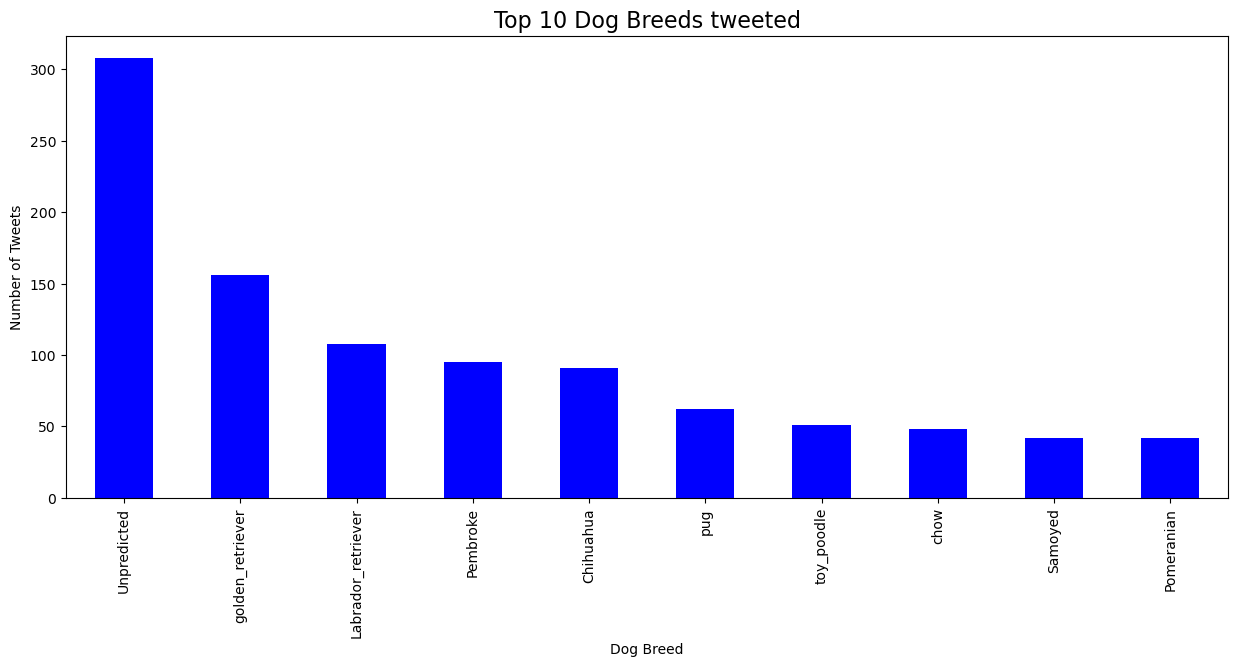

In [78]:
plt.figure(figsize=(15,6))
response.plot(kind='bar', color=['blue'])
plt.title('Top 10 Dog Breeds tweeted', fontsize=16)
plt.xlabel('Dog Breed')
plt.ylabel('Number of Tweets');

### Looking at bar graph

<ul>
    <li>
        Unpredicted dogs are the most tweeted dogs 
    </li>
</ul>

In [79]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

4294967295